In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'C:\Users\Nitsan Cooper\OneDrive\מסמכים\DiabetesMLProject\data\diabetic_data.csv')
data.head

<bound method NDFrame.head of         encounter_id  patient_nbr             race  gender      age weight   
0            2278392      8222157        Caucasian  Female   [0-10)      ?  \
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discha

In [3]:
data.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
filtered_data = data[['encounter_id', 'patient_nbr','race','gender', 'age', 'admission_type_id','time_in_hospital','num_procedures',
                      'admission_source_id', 'diabetesMed',
                      'payer_code', 'number_diagnoses', 'readmitted', 'change',
                      'num_medications', 'discharge_disposition_id']]
filtered_data.head()



,encounter_id,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,num_procedures,admission_source_id,diabetesMed,payer_code,number_diagnoses,readmitted,change,num_medications,discharge_disposition_id
0,2278392,8222157,Caucasian,Female,[0-10),6,1,0,1,No,?,1,NO,No,1,25
1,149190,55629189,Caucasian,Female,[10-20),1,3,0,7,Yes,?,9,>30,Ch,18,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,2,5,7,Yes,?,6,NO,No,13,1
3,500364,82442376,Caucasian,Male,[30-40),1,2,1,7,Yes,?,7,NO,Ch,16,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,0,7,Yes,?,5,NO,Ch,8,1


In [6]:
filtered_data['admission_num'] = filtered_data.groupby('patient_nbr').cumcount() + 1

filtered_data

C:\Users\Nitsan Cooper\AppData\Local\Temp\ipykernel_17756\2957102377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['admission_num'] = filtered_data.groupby('patient_nbr').cumcount() + 1


,encounter_id,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,num_procedures,admission_source_id,diabetesMed,payer_code,number_diagnoses,readmitted,change,num_medications,discharge_disposition_id,admission_num
0,2278392,8222157,Caucasian,Female,[0-10),6,1,0,1,No,?,1,NO,No,1,25,1
1,149190,55629189,Caucasian,Female,[10-20),1,3,0,7,Yes,?,9,>30,Ch,18,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,2,5,7,Yes,?,6,NO,No,13,1,1
3,500364,82442376,Caucasian,Male,[30-40),1,2,1,7,Yes,?,7,NO,Ch,16,1,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,0,7,Yes,?,5,NO,Ch,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,0,7,Yes,MC,9,>30,Ch,16,3,2
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,5,3,5,Yes,MC,9,NO,No,18,4,2
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,0,7,Yes,MC,13,NO,Ch,9,1,3
101764,443857166,31693671,Caucasian,Female,[80-90),2,10,2,7,Yes,MC,9,NO,Ch,21,3,4


In [5]:


# Combine the first two age levels into a single category
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[0-10)', '[10-20)'], '0-20')
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[20-30)', '[30-40)'], '20-40')
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[40-50)', '[50-60)'], '40-60')
filtered_data.loc[:,'age'] = filtered_data['age'].replace(['[60-70)', '[70-80)','[80-90)','[90-100)'], '60-100')
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num
0,2278392,8222157,Caucasian,Female,0-20,6,1,?,1,No,No,NO,1
1,149190,55629189,Caucasian,Female,0-20,1,7,?,9,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,20-40,1,7,?,6,No,Yes,NO,1
3,500364,82442376,Caucasian,Male,20-40,1,7,?,7,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,40-60,1,7,?,5,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,60-100,1,7,MC,9,Ch,Yes,>30,2
101762,443847782,74694222,AfricanAmerican,Female,60-100,1,5,MC,9,No,Yes,NO,2
101763,443854148,41088789,Caucasian,Male,60-100,1,7,MC,13,Ch,Yes,NO,3
101764,443857166,31693671,Caucasian,Female,60-100,2,7,MC,9,Ch,Yes,NO,4


In [10]:
filtered_data.loc[:,'payer_code'] = filtered_data['payer_code'].replace(['SP'], 'Self_Pay')
filtered_data.loc[:,'payer_code'] = filtered_data['payer_code'].replace(['MD', 'HM', 'UN', 'CP', 'SI', 'DM', 'CM','CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], 'private_HC')
filtered_data.loc[:,'payer_code'] = filtered_data['payer_code'].replace(['MC','BC'], 'public_HC')
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num
0,2278392,8222157,Caucasian,Female,0-20,6,1,?,1,No,No,NO,1
1,149190,55629189,Caucasian,Female,0-20,1,7,?,9,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,20-40,1,7,?,6,No,Yes,NO,1
3,500364,82442376,Caucasian,Male,20-40,1,7,?,7,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,40-60,1,7,?,5,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,60-100,1,7,public_HC,9,Ch,Yes,>30,2
101762,443847782,74694222,AfricanAmerican,Female,60-100,1,5,public_HC,9,No,Yes,NO,2
101763,443854148,41088789,Caucasian,Male,60-100,1,7,public_HC,13,Ch,Yes,NO,3
101764,443857166,31693671,Caucasian,Female,60-100,2,7,public_HC,9,Ch,Yes,NO,4


<Axes: >

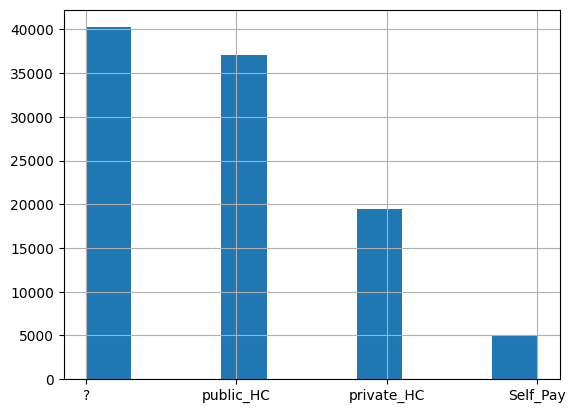

In [37]:
filtered_data['payer_code'].unique()

filtered_data['payer_code'].hist()

<Axes: >

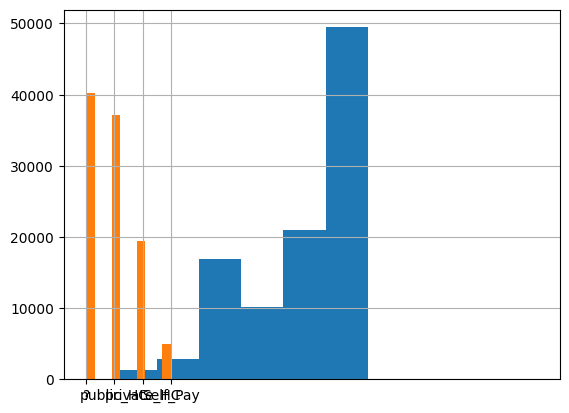

In [20]:
filtered_data['number_diagnoses'].hist()


KeyError: 1

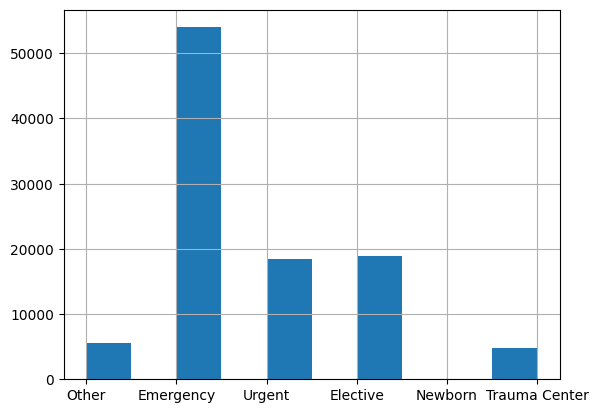

In [44]:
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([1], 'Emergency')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([2], 'Urgent')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([3], 'Elective')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([4], 'Newborn')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([5], 'Trauma Center')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([9], 'Unknown')
filtered_data.loc[:,'admission_type_id'] = filtered_data['admission_type_id'].replace([6,7,8], 'Other')
filtered_data['admission_type_id'].hist()
groups = filtered_data.groupby(1)
groups

filtered_data


In [42]:

filtered_data.describe(include = ['object', 'int64']
)



,encounter_id,patient_nbr,race,gender,age,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,admission_num,admission_type_id\t
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766,101766.000000,101766,101766,101766,101766.000000,101766.000000
unique,NaN,NaN,6,3,4,6,NaN,4,NaN,2,2,3,NaN,NaN
top,NaN,NaN,Caucasian,Female,60-100,Emergency,NaN,?,NaN,No,Yes,NO,NaN,NaN
freq,NaN,NaN,76099,54708,68541,53990,NaN,40256,NaN,54755,78363,54864,NaN,NaN
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,5.754437,NaN,7.422607,NaN,NaN,NaN,1.629513,2.024006
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,4.064081,NaN,1.933600,NaN,NaN,NaN,1.526402,1.445403
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,1.000000,1.000000
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,7.000000,NaN,8.000000,NaN,NaN,NaN,1.000000,1.000000
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,7.000000,NaN,9.000000,NaN,NaN,NaN,2.000000,3.000000


<Axes: >

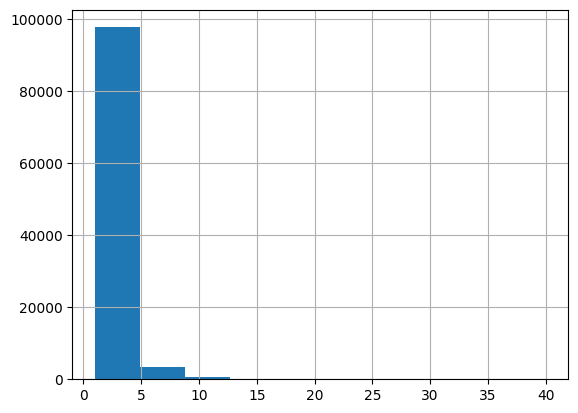

In [38]:
filtered_data['admission_num'].hist()


In [73]:
data = pd.read_csv('./data/after_tzuk.csv')
data.head()

data['payer_code']

0        2
1        2
2        2
3        2
4        2
        ..
59776    2
59777    2
59778    2
59779    2
59780    2
Name: payer_code, Length: 59781, dtype: int64

In [75]:
data_string = data.copy()
payer_code_map = {1 :'self'  ,2 : 'mid_class_insurance', 3 : 'premium'}
data_string['payer_code'] = data['payer_code'].map(payer_code_map)
data_string['payer_code']
gender_map = {'Male': 0, 'Female': 1}
data_string['gender'] = data['gender'].map(gender_map)
['gender']
data_string

,encounter_id,patient_nbr,race,gender,age_group,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,readmitted_less_than_30
0,72091308,20123568,Caucasian,1,4,1,7,mid_class_insurance,9,True,True,NO,False
1,72848634,20377854,Caucasian,1,4,2,1,mid_class_insurance,6,False,True,NO,False
2,73062156,20408121,Caucasian,1,4,1,7,mid_class_insurance,6,False,True,NO,False
3,73731852,20542797,Caucasian,0,4,1,7,mid_class_insurance,6,True,True,NO,False
4,80820942,20514150,Caucasian,1,4,2,1,mid_class_insurance,4,True,True,<30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59776,443835140,175326800,Caucasian,0,4,3,1,mid_class_insurance,16,True,True,NO,False
59777,443835512,139605341,Other,1,3,3,1,mid_class_insurance,8,True,True,NO,False
59778,443842022,188574944,Other,1,3,1,7,mid_class_insurance,9,True,True,>30,False
59779,443842070,140199494,Other,1,4,1,7,mid_class_insurance,9,False,True,>30,False


In [76]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
transformed = ohe.fit_transform(data_string[['race','payer_code']])
categories = np.hstack(ohe.categories_)
transformed_df = pd.DataFrame(transformed, columns=categories)
data_encoded = pd.concat([data_string.drop(['race','payer_code'], axis=1).reset_index(drop=True), transformed_df], axis=1)
data_encoded




,encounter_id,patient_nbr,gender,age_group,admission_type_id,admission_source_id,number_diagnoses,change,diabetesMed,readmitted,readmitted_less_than_30,AfricanAmerican,Asian,Caucasian,Hispanic,Other,mid_class_insurance,premium,self
0,72091308,20123568,1,4,1,7,9,True,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,72848634,20377854,1,4,2,1,6,False,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,73062156,20408121,1,4,1,7,6,False,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,73731852,20542797,0,4,1,7,6,True,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,80820942,20514150,1,4,2,1,4,True,True,<30,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59776,443835140,175326800,0,4,3,1,16,True,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
59777,443835512,139605341,1,3,3,1,8,True,True,NO,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
59778,443842022,188574944,1,3,1,7,9,True,True,>30,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
59779,443842070,140199494,1,4,1,7,9,False,True,>30,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


[array(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'],
       dtype=object)]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data_encoded.drop(['readmitted', 'readmitted_less_than_30'], axis = 1)
y = data_encoded['readmitted_less_than_30']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Initialize a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [68]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[11287    55]
 [  591    24]]


In [78]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     45159
        True       1.00      1.00      1.00      2665

    accuracy                           1.00     47824
   macro avg       1.00      1.00      1.00     47824
weighted avg       1.00      1.00      1.00     47824



In [11]:
#table 1 and descriptive statistics
from utils import createLabels
from utils import prepareData
import pandas as pd
data=createLabels(r'C:\Users\Nitsan Cooper\OneDrive\מסמכים\DiabetesMLProject\data\diabetic_data.csv')


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Nitsan Cooper\\OneDrive\\מסמכים\\DiabetesMLProject\\collapsed_data.csv'

In [10]:

from utils import createLabels
data=createLabels(r'C:\Users\Nitsan Cooper\OneDrive\מסמכים\DiabetesMLProject\data\diabetic_data.csv')

data.head()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Nitsan Cooper\\OneDrive\\מסמכים\\DiabetesMLProject\\collapsed_data.csv'

In [14]:
data=pd.read_csv(r'C:\Users\Nitsan Cooper\OneDrive\מסמכים\DiabetesMLProject\collapsed_data.csv')
data.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age_group,admission_type_id,time_in_hospital,num_procedures,admission_source_id,diabetesMed,payer_code,number_diagnoses,readmitted,change,num_medications,discharge_disposition_id,readmitted_less_than_30
0,4267,24437208.0,135.0,0.0,0.0,3.0,2.0,8.0,6.0,1.0,1.0,2.0,8.0,1.0,1.0,33.0,1.0,0.0
1,4780,26264286.0,135.0,0.0,0.0,3.0,1.0,3.0,1.0,7.0,1.0,2.0,5.0,0.0,1.0,14.0,1.0,0.0
2,5827,29758806.0,378.0,0.0,0.0,3.0,3.0,2.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,1.0,0.0
3,67608,189899286.0,729.0,0.0,0.0,4.0,1.0,4.0,2.0,7.0,1.0,2.0,9.0,0.0,0.0,23.0,3.0,0.0
4,17494,64331490.0,774.0,0.0,0.0,4.0,1.0,3.0,0.0,7.0,1.0,2.0,9.0,0.0,1.0,20.0,1.0,0.0


In [15]:

for col in data.columns:
    unique_vals = data[col].unique()
    print(f"Unique values in {col}: {unique_vals}")

Unique values in Unnamed: 0: [  4267   4780   5827 ...  93651 101748  96147]
Unique values in encounter_id: [2.44372080e+07 2.62642860e+07 2.97588060e+07 ... 3.38462954e+08
 4.43811536e+08 3.71459060e+08]
Unique values in patient_nbr: [1.35000000e+02 3.78000000e+02 7.29000000e+02 ... 1.89445127e+08
 1.89481478e+08 1.89502619e+08]
Unique values in race: [0. 2. 3. 1. 4.]
Unique values in gender: [0. 1.]
Unique values in age_group: [3. 4. 2. 1. 0.]
Unique values in admission_type_id: [2. 1. 3. 6. 8. 4. 5. 7.]
Unique values in time_in_hospital: [ 8.  3.  2.  4.  5.  6. 10. 12.  9.  1. 14. 11.  7. 13.]
Unique values in num_procedures: [6. 1. 2. 0. 4. 5. 3.]
Unique values in admission_source_id: [ 1.  7.  4.  6.  5.  2. 17.  9.  3. 20.  8. 14. 10. 11. 22. 13. 25.]
Unique values in diabetesMed: [1. 0.]
Unique values in payer_code: [2. 3. 1.]
Unique values in number_diagnoses: [ 8.  5.  3.  9.  2.  6.  7.  4.  1. 13. 16. 15. 11. 10. 14. 12.]
Unique values in readmitted: [1. 0.]
Unique values i

In [16]:
print(data.dtypes)

Unnamed: 0                    int64
encounter_id                float64
patient_nbr                 float64
race                        float64
gender                      float64
age_group                   float64
admission_type_id           float64
time_in_hospital            float64
num_procedures              float64
admission_source_id         float64
diabetesMed                 float64
payer_code                  float64
number_diagnoses            float64
readmitted                  float64
change                      float64
num_medications             float64
discharge_disposition_id    float64
readmitted_less_than_30     float64
dtype: object


In [17]:
#turn integer variables into categorical and labeling
fdata= pd.DataFrame(data)

race_mapping_reverse = {
    0: 'Caucasian',
    1: 'Asian',
    2: 'AfricanAmerican',
    3: 'Hispanic',
    4: 'Other'
}
fdata['race'] = fdata['race'].replace(race_mapping_reverse)
fdata['race'] = fdata['race'].astype('category')

age_group_mapping_reverse = {
    0: '0-10',
    1: '10-20',
    2: '20-40',
    3: '40-50',
    4: '60-100'
}
fdata['age_group'] = fdata['age_group'].replace(age_group_mapping_reverse)
fdata['age_group'] = fdata['age_group'].astype('category')

gender_mapping_reverse = {
    0: 'Female',
    1: 'Male',
}
fdata['gender'] = fdata['gender'].replace(gender_mapping_reverse)
fdata['gender'] = fdata['gender'].astype('category')

diabetesMed_mapping_reverse = {
    0: 'Not_using_meds',
    1: 'Using_meds',
}
fdata['diabetesMed'] = fdata['diabetesMed'].replace(diabetesMed_mapping_reverse)
fdata['diabetesMed'] = fdata['diabetesMed'].astype('category')

payer_code_mapping_reverse = {
    1: 'self_pay',
    2: 'mid_class_insurance',
    3:'expensive/premium',
}
fdata['payer_code'] = fdata['payer_code'].replace(payer_code_mapping_reverse)
fdata['payer_code'] = fdata['payer_code'].astype('category')
# Define the payer code categories: 1 = self pay, 2 = mid class insurance, 3 = expensive/premium

fdata = fdata.rename(columns={'change': 'changed_meds'})
changed_meds_mapping_reverse = {
    0: 'no',
    1: 'yes',
}

fdata['changed_meds'] = fdata['changed_meds'].replace(changed_meds_mapping_reverse)
fdata['changed_meds'] = fdata['changed_meds'].astype('category')

readmitted_less_than_30_meds_mapping_reverse = {
    0: 'no',
    1: 'yes',
}

fdata['readmitted_less_than_30'] = fdata['readmitted_less_than_30'].replace(readmitted_less_than_30_meds_mapping_reverse)
fdata['readmitted_less_than_30'] = fdata['readmitted_less_than_30'].astype('category')



print(fdata.dtypes)
fdata.head()


Unnamed: 0                     int64
encounter_id                 float64
patient_nbr                  float64
race                        category
gender                      category
age_group                   category
admission_type_id            float64
time_in_hospital             float64
num_procedures               float64
admission_source_id          float64
diabetesMed                 category
payer_code                  category
number_diagnoses             float64
readmitted                   float64
changed_meds                category
num_medications              float64
discharge_disposition_id     float64
readmitted_less_than_30     category
dtype: object


,Unnamed: 0,encounter_id,patient_nbr,race,gender,age_group,admission_type_id,time_in_hospital,num_procedures,admission_source_id,diabetesMed,payer_code,number_diagnoses,readmitted,changed_meds,num_medications,discharge_disposition_id,readmitted_less_than_30
0,4267,24437208.0,135.0,Caucasian,Female,40-50,2.0,8.0,6.0,1.0,Using_meds,mid_class_insurance,8.0,1.0,yes,33.0,1.0,no
1,4780,26264286.0,135.0,Caucasian,Female,40-50,1.0,3.0,1.0,7.0,Using_meds,mid_class_insurance,5.0,0.0,yes,14.0,1.0,no
2,5827,29758806.0,378.0,Caucasian,Female,40-50,3.0,2.0,1.0,1.0,Not_using_meds,mid_class_insurance,3.0,0.0,no,11.0,1.0,no
3,67608,189899286.0,729.0,Caucasian,Female,60-100,1.0,4.0,2.0,7.0,Using_meds,mid_class_insurance,9.0,0.0,no,23.0,3.0,no
4,17494,64331490.0,774.0,Caucasian,Female,60-100,1.0,3.0,0.0,7.0,Using_meds,mid_class_insurance,9.0,0.0,yes,20.0,1.0,no


In [19]:


desc_stats = fdata.describe(include='all')
desc_stats_T = desc_stats.transpose()
print(desc_stats_T)


                             count unique  ...          75%          max
Unnamed: 0                101766.0    NaN  ...     76323.75     101765.0
encounter_id              101766.0    NaN  ...  230270887.5  443867222.0
patient_nbr               101766.0    NaN  ...  87545949.75  189502619.0
race                        101766      5  ...          NaN          NaN
gender                      101766      2  ...          NaN          NaN
age_group                   101766      5  ...          NaN          NaN
admission_type_id         101766.0    NaN  ...          3.0          8.0
time_in_hospital          101766.0    NaN  ...          6.0         14.0
num_procedures            101766.0    NaN  ...          2.0          6.0
admission_source_id       101766.0    NaN  ...          7.0         25.0
diabetesMed                 101766      2  ...          NaN          NaN
payer_code                  101766      3  ...          NaN          NaN
number_diagnoses          101766.0    NaN  ...     

In [21]:
from tableone import TableOne

In [24]:
data1 = fdata.drop(columns=['encounter_id', 'patient_nbr','Unnamed: 0','admission_type_id','admission_source_id','discharge_disposition_id'])
data1.head()
groupby = ['readmitted_less_than_30']
nonnormal = ['time_in_hospital']
data1['num_medications']=data1['num_medications'].astype(int)
labels={'readmitted_less_than_30': 'will be readmitted within 30 days'}

table1=TableOne(data1,categorical=['race','gender','age_group','diabetesMed','payer_code','changed_meds','readmitted'],groupby='readmitted_less_than_30', rename=labels,pval=True,htest_name=True)
print(table1.tabulate(tablefmt = "fancy_grid"))


╒═════════════════════════════╤═════════════════════╤═══════════╤══════════════╤══════════════╤═════════════╤═══════════╤═══════════════════╕
│                             │                     │ Missing   │ Overall      │ no           │ yes         │ P-Value   │ Test              │
╞═════════════════════════════╪═════════════════════╪═══════════╪══════════════╪══════════════╪═════════════╪═══════════╪═══════════════════╡
│ n                           │                     │           │ 101766       │ 96702        │ 5064        │           │                   │
├─────────────────────────────┼─────────────────────┼───────────┼──────────────┼──────────────┼─────────────┼───────────┼───────────────────┤
│ race, n (%)                 │ AfricanAmerican     │ 0         │ 19210 (18.9) │ 18148 (18.8) │ 1062 (21.0) │ 0.001     │ Chi-squared       │
├─────────────────────────────┼─────────────────────┼───────────┼──────────────┼──────────────┼─────────────┼───────────┼───────────────────┤
│     

In [129]:
table1.to_html(r'C:\Users\Nitsan Cooper\OneDrive\מסמכים\DiabetesMLProject\table1.html')